# Design Optimization Homework 2

## Problem 1 solution

Find a stationary point

$$\frac{\partial f}{\partial x_1} = 4x_1-4x_2=0 $$
$$\frac{\partial f}{\partial x_2} = -4x_1+3x_2+1=0 $$

Solve these to get the stationary point $x_* = [1,1]^T$.
\
Calculate the Hessian to get $H=\begin{bmatrix}
4 & -4\\
-4 & 3 
\end{bmatrix}$. 
\
Eigen value of this hessian matrix is given as: $\lambda_{1,2} = \frac{-7 \pm \sqrt65}{2} $.

It is indefinite as one eigenvalue is positive and the other one is negative. 
So, the stationary point is a <u>saddle point</u>. 
        
Now, to find the direction of downslope, denote $\partial \text{x}_*=\text{x}-\text{x}_*$ and $\partial f_* = f(\text{x})-f(\text{x}_*)$
\
Therefore,

$$
            \begin{aligned}
                \partial f_* & = \nabla f_* \partial \text{x}_* + \frac{1}{2} \partial \text{x}_*^T \text{H} \partial\text{x}_* \\
                & = \frac{1}{2}(2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2)
            \end{aligned}
$$

To get the downslope value $\frac{1}{2}(2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2) < 0 $ or $ (2\partial x_1 -\partial x_2)(2\partial x_1 -3\partial x_2) < 0. $

By setting $\partial f_*<0$ to get the downslopes $2\partial x_1 -\partial x_2<0$ and $2\partial x_1 -3\partial x_2>0$ or $2\partial x_1 -\partial x_2>0$ and $2\partial x_1 -3\partial x_2<0$.

Hence, 
The value of a=2, b=1, c=2, d=3. 

## Problem 2 solution
**Part (a)**


$$ \min_{x_1,x_2,x_3}  \quad (x_1+1)^2+x_2^2 + (x_3-1)^2 $$                
$$ \text{subject to:} \quad x_1+2x_2+3x_3=1 $$

Substituting $x_1=1-2x_2-3x_3$, the problem reduces to an unconstrained optimization problem. 

$$ minimize: f =\quad (2-2x_2-3x_3)^2 + x_2^2 +(x_3-1)^2 = 5x_2^2- 8x_2+12x_2x_3- 14x_3+10x_3^2 +5 $$

Hence, the gradient is given as:
$G=\begin{bmatrix}
10x_2 +12x_3 -8\\
20x_3+12x_2-14 
\end{bmatrix}$. 

Setting gradient to zero, we find the values of $x_1,x_2,x_3$.

The solution is $x_1=-15/14,x_2=-1/7,x_3=11/14$.

The Hessian matrix is given as:
$H=\begin{bmatrix}
10 & 12\\
12 & 20 
\end{bmatrix}$.

With eigen values, $\lambda_1= 28$ and $\lambda_2=2 $.

The unconstrained problem has positive definite Hessian everywhere. The problem is thus convex. You can also show that the original problem has a convex objective function and a convex feasible solution set.

**Part (b)**

**1. Solving with gradient descent algorithm**

[array([[0],
       [0]]), array([[0.0625  ],
       [0.109375]]), array([[0.10986328],
       [0.19580078]]), array([[0.14542389],
       [0.26428223]]), array([[0.17178619],
       [0.31872964]]), array([[0.19098449],
       [0.36219818]]), array([[0.20460775],
       [0.39707492]]), array([[0.21389699],
       [0.42522498]]), array([[0.2257459 ],
       [0.47098649]]), array([[0.22716314],
       [0.50022586]]), array([[0.22287655],
       [0.52006219]]), array([[0.20820431],
       [0.54894461]]), array([[0.124532  ],
       [0.61427662]]), array([[0.08599204],
       [0.62803184]]), array([[0.03645422],
       [0.67896418]]), array([[0.02045071],
       [0.67844123]]), array([[-0.02277453],
       [ 0.70166208]]), array([[-0.03478701],
       [ 0.71666537]]), array([[-0.05054416],
       [ 0.72192391]]), array([[-0.06039699],
       [ 0.73242714]]), array([[-0.08354146],
       [ 0.74195478]]), array([[-0.0856678 ],
       [ 0.74706109]]), array([[-0.09917469],
       [ 0.75791006

C:\Users\adity\AppData\Local\Temp\ipykernel_19144\1033258415.py:44: RuntimeWarning: divide by zero encountered in log
  f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))


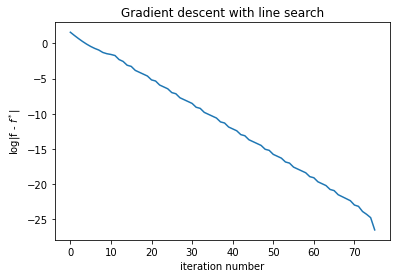

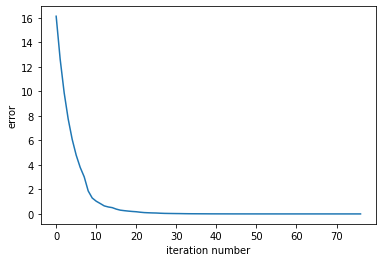

In [8]:
import numpy as np
import matplotlib.pyplot as mplt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-5  # using epsilon as termination criteria
x_0 = np.array([[0], [0]]) # where x_0 is the initial guess
iter = 0  # counter
soln = [x_0]
x = soln[iter]  # starting with the initial guess of 2,5
error = np.linalg.norm(grad(x), ord=2)

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

# Armijo line search

def line_search(x):
    dx = 1.  # step size
    phi = lambda dx, x: obj(x) - dx * 0.8 * np.matmul(grad(x).T, grad(x))  # define phi as a search criterion
    while phi(dx, x) < obj(x - dx * grad(x)):  # if f(x+dx*d)>phi(dx) then backtrack. d is the search direction
        dx = 0.5 * dx
    return dx

while error >= eps:  # keep searching while gradient norm is larger than eps
    x_star = line_search(x)
    x = x - x_star * grad(x)
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
f_error_list = list()
for i in range(len(iter_list)):
    f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))
    
mplt.figure(1)
mplt.plot(iter_list, f_error_list)
mplt.xlabel('iteration number')
mplt.ylabel('log|f - $f^*$|')
mplt.title('Gradient descent with line search')
mplt.show()

mplt.figure(2)
mplt.plot(iter_list, error_list)
mplt.xlabel('iteration number')
mplt.ylabel('error')
mplt.show()

**2. Solving with newtons algorithm**

[array([[0],
       [0]]), array([[-0.07142857],
       [ 0.39285714]]), array([[-0.10714286],
       [ 0.58928571]]), array([[-0.125 ],
       [ 0.6875]]), array([[-0.13392857],
       [ 0.73660714]]), array([[-0.13839286],
       [ 0.76116071]]), array([[-0.140625 ],
       [ 0.7734375]]), array([[-0.14174107],
       [ 0.77957589]]), array([[-0.14229911],
       [ 0.78264509]]), array([[-0.14257812],
       [ 0.78417969]]), array([[-0.14271763],
       [ 0.78494699]]), array([[-0.14278739],
       [ 0.78533064]]), array([[-0.14282227],
       [ 0.78552246]]), array([[-0.1428397 ],
       [ 0.78561837]]), array([[-0.14284842],
       [ 0.78566633]]), array([[-0.14285278],
       [ 0.78569031]]), array([[-0.14285496],
       [ 0.7857023 ]]), array([[-0.14285605],
       [ 0.78570829]]), array([[-0.1428566 ],
       [ 0.78571129]]), array([[-0.14285687],
       [ 0.78571279]]), array([[-0.14285701],
       [ 0.78571354]]), array([[-0.14285707],
       [ 0.78571391]])]
The point in the 

C:\Users\adity\AppData\Local\Temp\ipykernel_19144\3982701077.py:37: RuntimeWarning: divide by zero encountered in log
  f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))


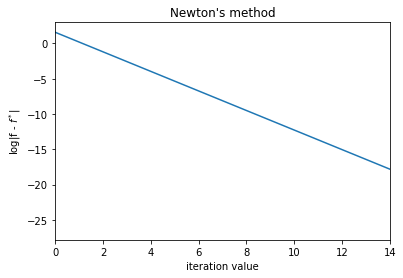

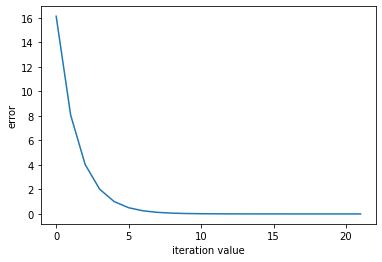

In [9]:
import numpy as np
import matplotlib.pyplot as mplt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

eps = 1e-5  # using epsilon as termination criteria
x_0 = np.array([[0], [0]])  # where x_0 is the initial guess
iter = 0 
soln = [x_0]  
x = soln[iter]  # starting with the initial guess of 2,5
error = np.linalg.norm(grad(x), ord=2)

H = np.array([[10, 12], [12, 20]])  #Hessian matrix
dx = 0.5 #Step value

error_list = list()
iter_list = list()
error_list.append(error)
iter_list.append(iter)

while error >= eps:  # searching while gradient norm is larger than epsilon
    x = x - dx * np.matmul(np.linalg.inv(H), grad(x))
    soln.append(x)
    error = np.linalg.norm(grad(x), ord=2)
    iter += 1
    error_list.append(error)
    iter_list.append(iter)

print(soln)  # print the search trajectory
print('The point in the plane is', 'x1 =', 1-2*soln[-1][0]-3*soln[-1][1], 'x2 =', soln[-1][0], 'x3 =', soln[-1][1])
f_error_list = list()
for i in range(len(iter_list)):
    f_error_list.append(np.log(abs(obj(soln[i]) - obj(soln[-1]))))
    
mplt.figure(1)
mplt.plot(iter_list, f_error_list)
mplt.xlabel('iteration value')
mplt.xlim(0, 14)
mplt.ylabel('log|f - $f^*$|')
mplt.title('''Newton's method''')
mplt.show()

mplt.figure(2)
mplt.plot(iter_list, error_list)
mplt.xlabel('iteration value')
mplt.ylabel('error')
mplt.show()


## Problem 3 solution

Prove that a hyperplane defined as $ a^Tx=c $ for $ x \in \mathbb{R}^n $

let $ S \in \{ x\in \mathbb{R}^n  | a^Tx=c \}$

let $ x_1,x_2 \in S $

Therefore, 

$a^Tx_1=c$ and $a^Tx_2=c$

Hence, the equaiton joining line segment for $x_1$ and $x_2$ is given as :

v = $\lambda x_1 + (1-\lambda)x_2 $ where $\lambda \in [0,1]$

$\Rightarrow $ $a^Tv = a^T(\lambda x_1 + (1-\lambda)x_2) $
= $ \lambda a^T x_1 + (1-\lambda)a^T x_2$ = $\lambda c +(1-\lambda)c = c .$

$\Rightarrow $ $a^Tv = c.$

i.e $\lambda x_1 + (1-\lambda)x_2 $ $\in S$

Hence, <u> S is a convex set.</u>


## Problem 4 solution

The problem can be formulated as
$$
\begin{aligned}
\min_{\text{p}} \quad & \max_{k}\{h(\text{a}_k^T \text{p}, I_t)\}\\
\text{subject to:} \quad & 0 \leq p_i \leq p_{max} ~\forall i=1,...,n
\end{aligned}
$$

$I_t$ the target intensity level. $h(I, I_t)$ is defined as follows:

$$
\begin{equation}
h(I,I_t)=
    \begin{cases}
        \frac{I_t}{I} & \text{if } I \leq I_t\\
         \frac{I}{I_t} & \text{if } I \geq I_t
    \end{cases}
\end{equation}
$$

**Part (a)**

Showing that the problem is convex,
\begin{gather}
\frac{\partial h}{\partial p} = \frac{\partial h}{\partial I} \frac{\partial (a^Tp)}{\partial p} = h^\prime a. \\
\frac{\partial^2 h}{\partial p^2} = \frac{\partial h^\prime}{\partial I} \frac{\partial (a^Tp)}{\partial p} a^T= h^{\prime \prime} aa^T.
\end{gather}

It can be concluded that funciton h is a convex function since $h^{\prime \prime}aa^T \geq 0.$

**Part (b)**

If the required overall power output of any of the 10 lamps has to be less than $p^*$. Then, as the problem in the previous part consists of a convex set and it is a closed set. Hence, there <u> exists a unique solution</u> .

**Part (c)**

If it is required to have more than 10 lamps to be switched on which means p>0. This changes the set from convex set to a non convex set even though the function remains convex. Hence, It is <u> not certain to have a unique solution </u> in this case. 

## Problem 5 solution
We know that c(x) is the cost function for f producing x amount of product A and assuming that c(x) is differentiable everywhere. 

Let y be the price set for the product. Assuming that the product is sold out.

The total profit is defined as : 

$$\begin{aligned}
c^*(y)=\max_{x}\{xy-c(x)\}.
\end{aligned}$$
 
To show that $c^∗(y)$ is a convex function with respect to y, 

We know that $xy-c(x)$ is a linear function in y, therefore it is a convex set. 

Now, as we are taking the maximum of this linear function, we can imagine it as taking maximum of convex functions hence it will be a convex function as well. This means for any y there exists a corresponding maximum value of x.


Which proves that $c^∗(y)$ is a convex function with respect to y.